<a href="https://colab.research.google.com/github/BuxinSu/Census_2020_Privacy/blob/main/Figures/Improvement_IID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Setting**


In [ ]:
from sklearn.isotonic import isotonic_regression
import cvxpy as cp
import numpy as np
import csv, os
from scipy import stats
from sklearn import metrics
import itertools
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statistics
from scipy.stats import levene
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

!apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

# Set the text properties to use LaTeX fonts with Computer Modern
plt.rcParams.update({
    'text.usetex': True,  # Use LaTeX for rendering text
    'font.family': 'serif',  # Use a serif font family (which will be Computer Modern)
    'font.serif': ['Computer Modern Roman'],  # Explicitly use the Computer Modern font
    'axes.unicode_minus': False,  # Ensure minus signs are displayed correctly
    'font.size': 20,  #In a row, use 20 for single picture, # 30 for double figures, # 55 for four figures
    'figure.figsize': (13, 8),  # Figure size in inches
    'figure.dpi': 300,  # Dots per inch (high resolution)
})

def format_func(value, tick_number):
    if value < 10:
        return f"{value:.2f}"
    elif value < 100:
        return f"{value:.1f}"
    else:
        return f"{int(value)}"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 ghostscript libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0
  libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x libavalon-framework-

# **Improvement in Epsilon**

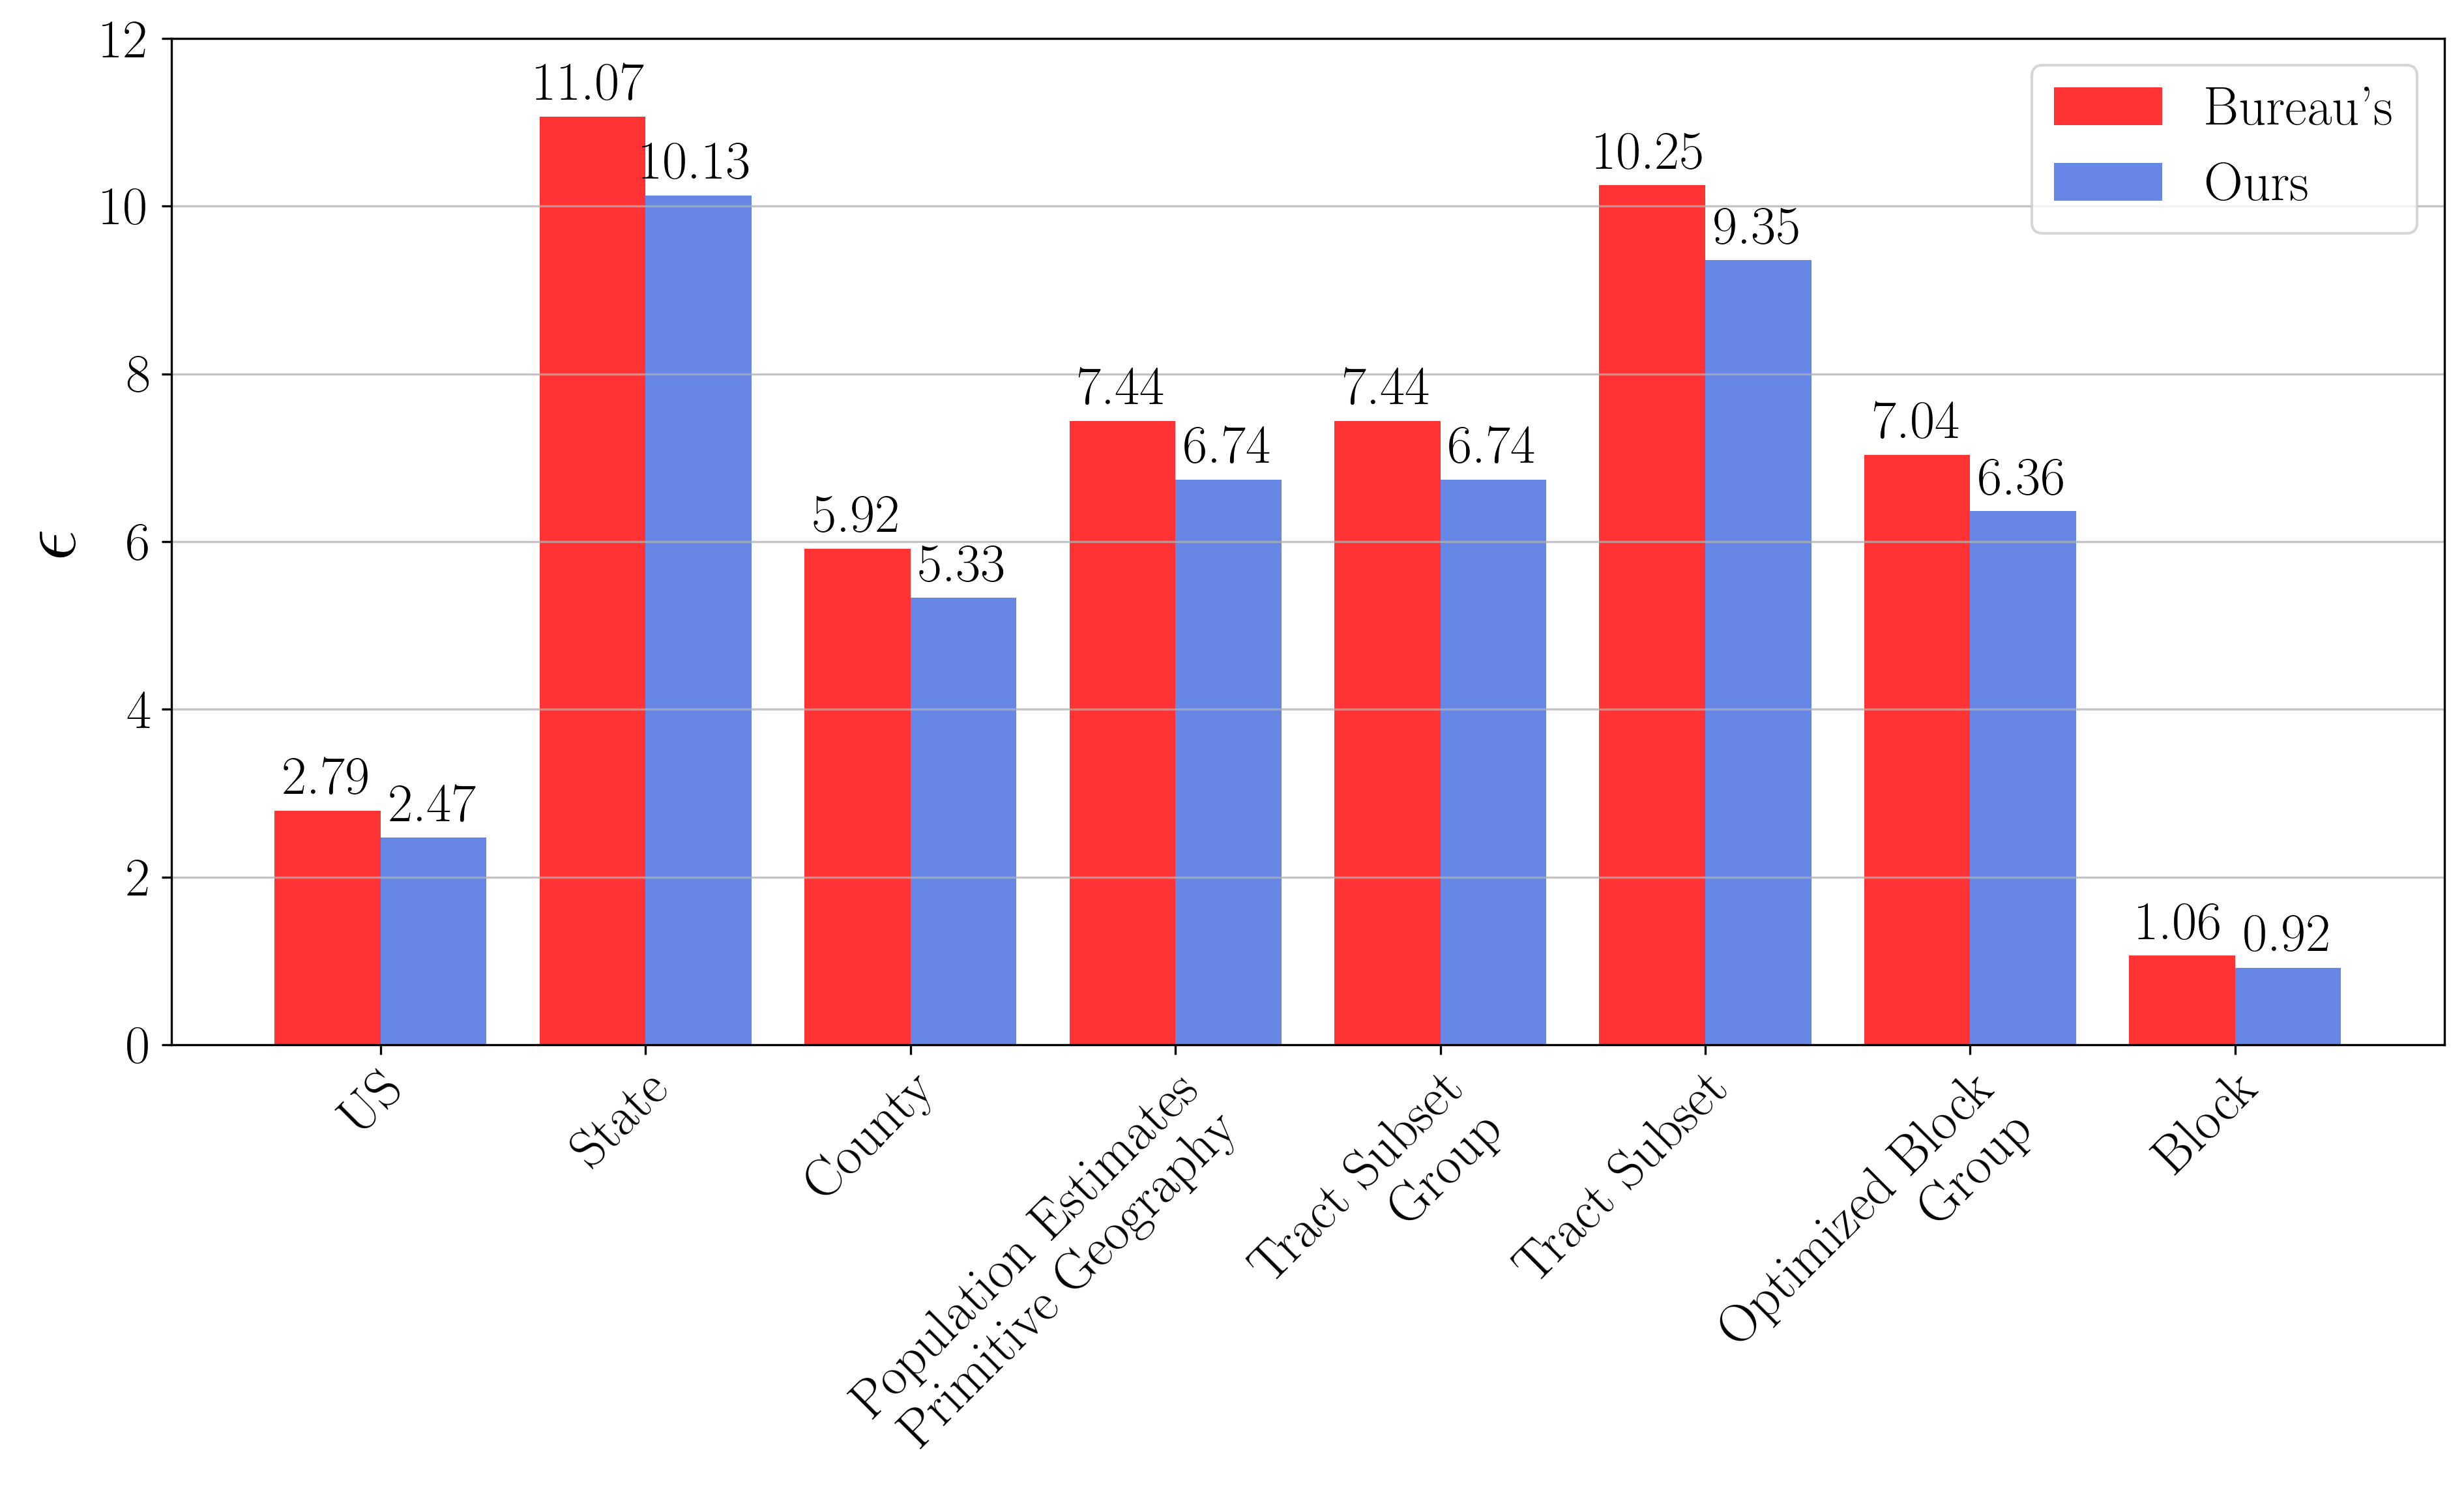

In [ ]:
geographic_levels = ["US", "State", "County", "Population Estimates \n Primitive Geography", "Tract Subset \n Group ", "Tract Subset ", "Optimized Block \n Group", "Block"]
old_mse_list = [2.79254101250502850817, 11.06607613081548890932, 5.91672742387871597458, 7.43826255206871955750, 7.43826255206871955750, 10.25013110045012432181, 7.03644216725960003345, 1.06422370507600305700]
new_mse_list = [2.46815716972588639067, 10.1254170441117459233, 5.32760866780257202890, 6.73826841899585815554, 6.73826841899585815554, 9.35357256665385961014, 6.36242614755529700687, 0.91782986057794513357
]

fig, ax = plt.subplots()

total_bar_width = 0.8

bar_positions_1 = np.arange(len(geographic_levels))
bar_positions_2 = bar_positions_1 + total_bar_width/2

bar_width = total_bar_width / 2

bars_1 = ax.bar(bar_positions_1, old_mse_list, bar_width, alpha=0.8, color='red', label='Bureau’s  ')
bars_2 = ax.bar(bar_positions_2, new_mse_list, bar_width, alpha=0.8, color='royalblue', label='Ours  ')

for bar in bars_1 + bars_2:
    height = round(bar.get_height(), 2)
    ax.annotate(f'{height}', (bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 2),  # Adjust this value to move the text up or down
                textcoords='offset points',
                ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
# ax.set_xlabel('Mean Absolute Error')
ax.set_ylabel('$\epsilon$', fontsize = 30)
ax.set_ylim(0, 12)
ax.set_xticks(bar_positions_1 + total_bar_width / 4)
ax.set_xticklabels(geographic_levels, rotation=45, ha="right", rotation_mode="anchor")
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Research/Discrete Gaussian Mechanism/Results/Figures_Allocation_2022_08/IID_Epsilon_Improvement.pdf", bbox_inches='tight')
plt.show()


In [ ]:
for i in range(len(old_mse_list)):
  print( (old_mse_list[i] - new_mse_list[i])/old_mse_list[i] )

0.116160816019012
0.08500385101131808
0.09956834477427162
0.09410720960342815
0.09410720960342815
0.08746800650743806
0.09578932131930022
0.13755927799747986


# **Setting**


In [ ]:
from sklearn.isotonic import isotonic_regression
import cvxpy as cp
import numpy as np
import csv, os
from scipy import stats
from sklearn import metrics
import itertools
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statistics
from scipy.stats import levene
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set the text properties to use LaTeX fonts
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 28
plt.rcParams['figure.figsize'] = (20,10)  # width, height in inches
plt.rcParams['figure.dpi'] = 300  # dots per inch


# **Improvement in Error**

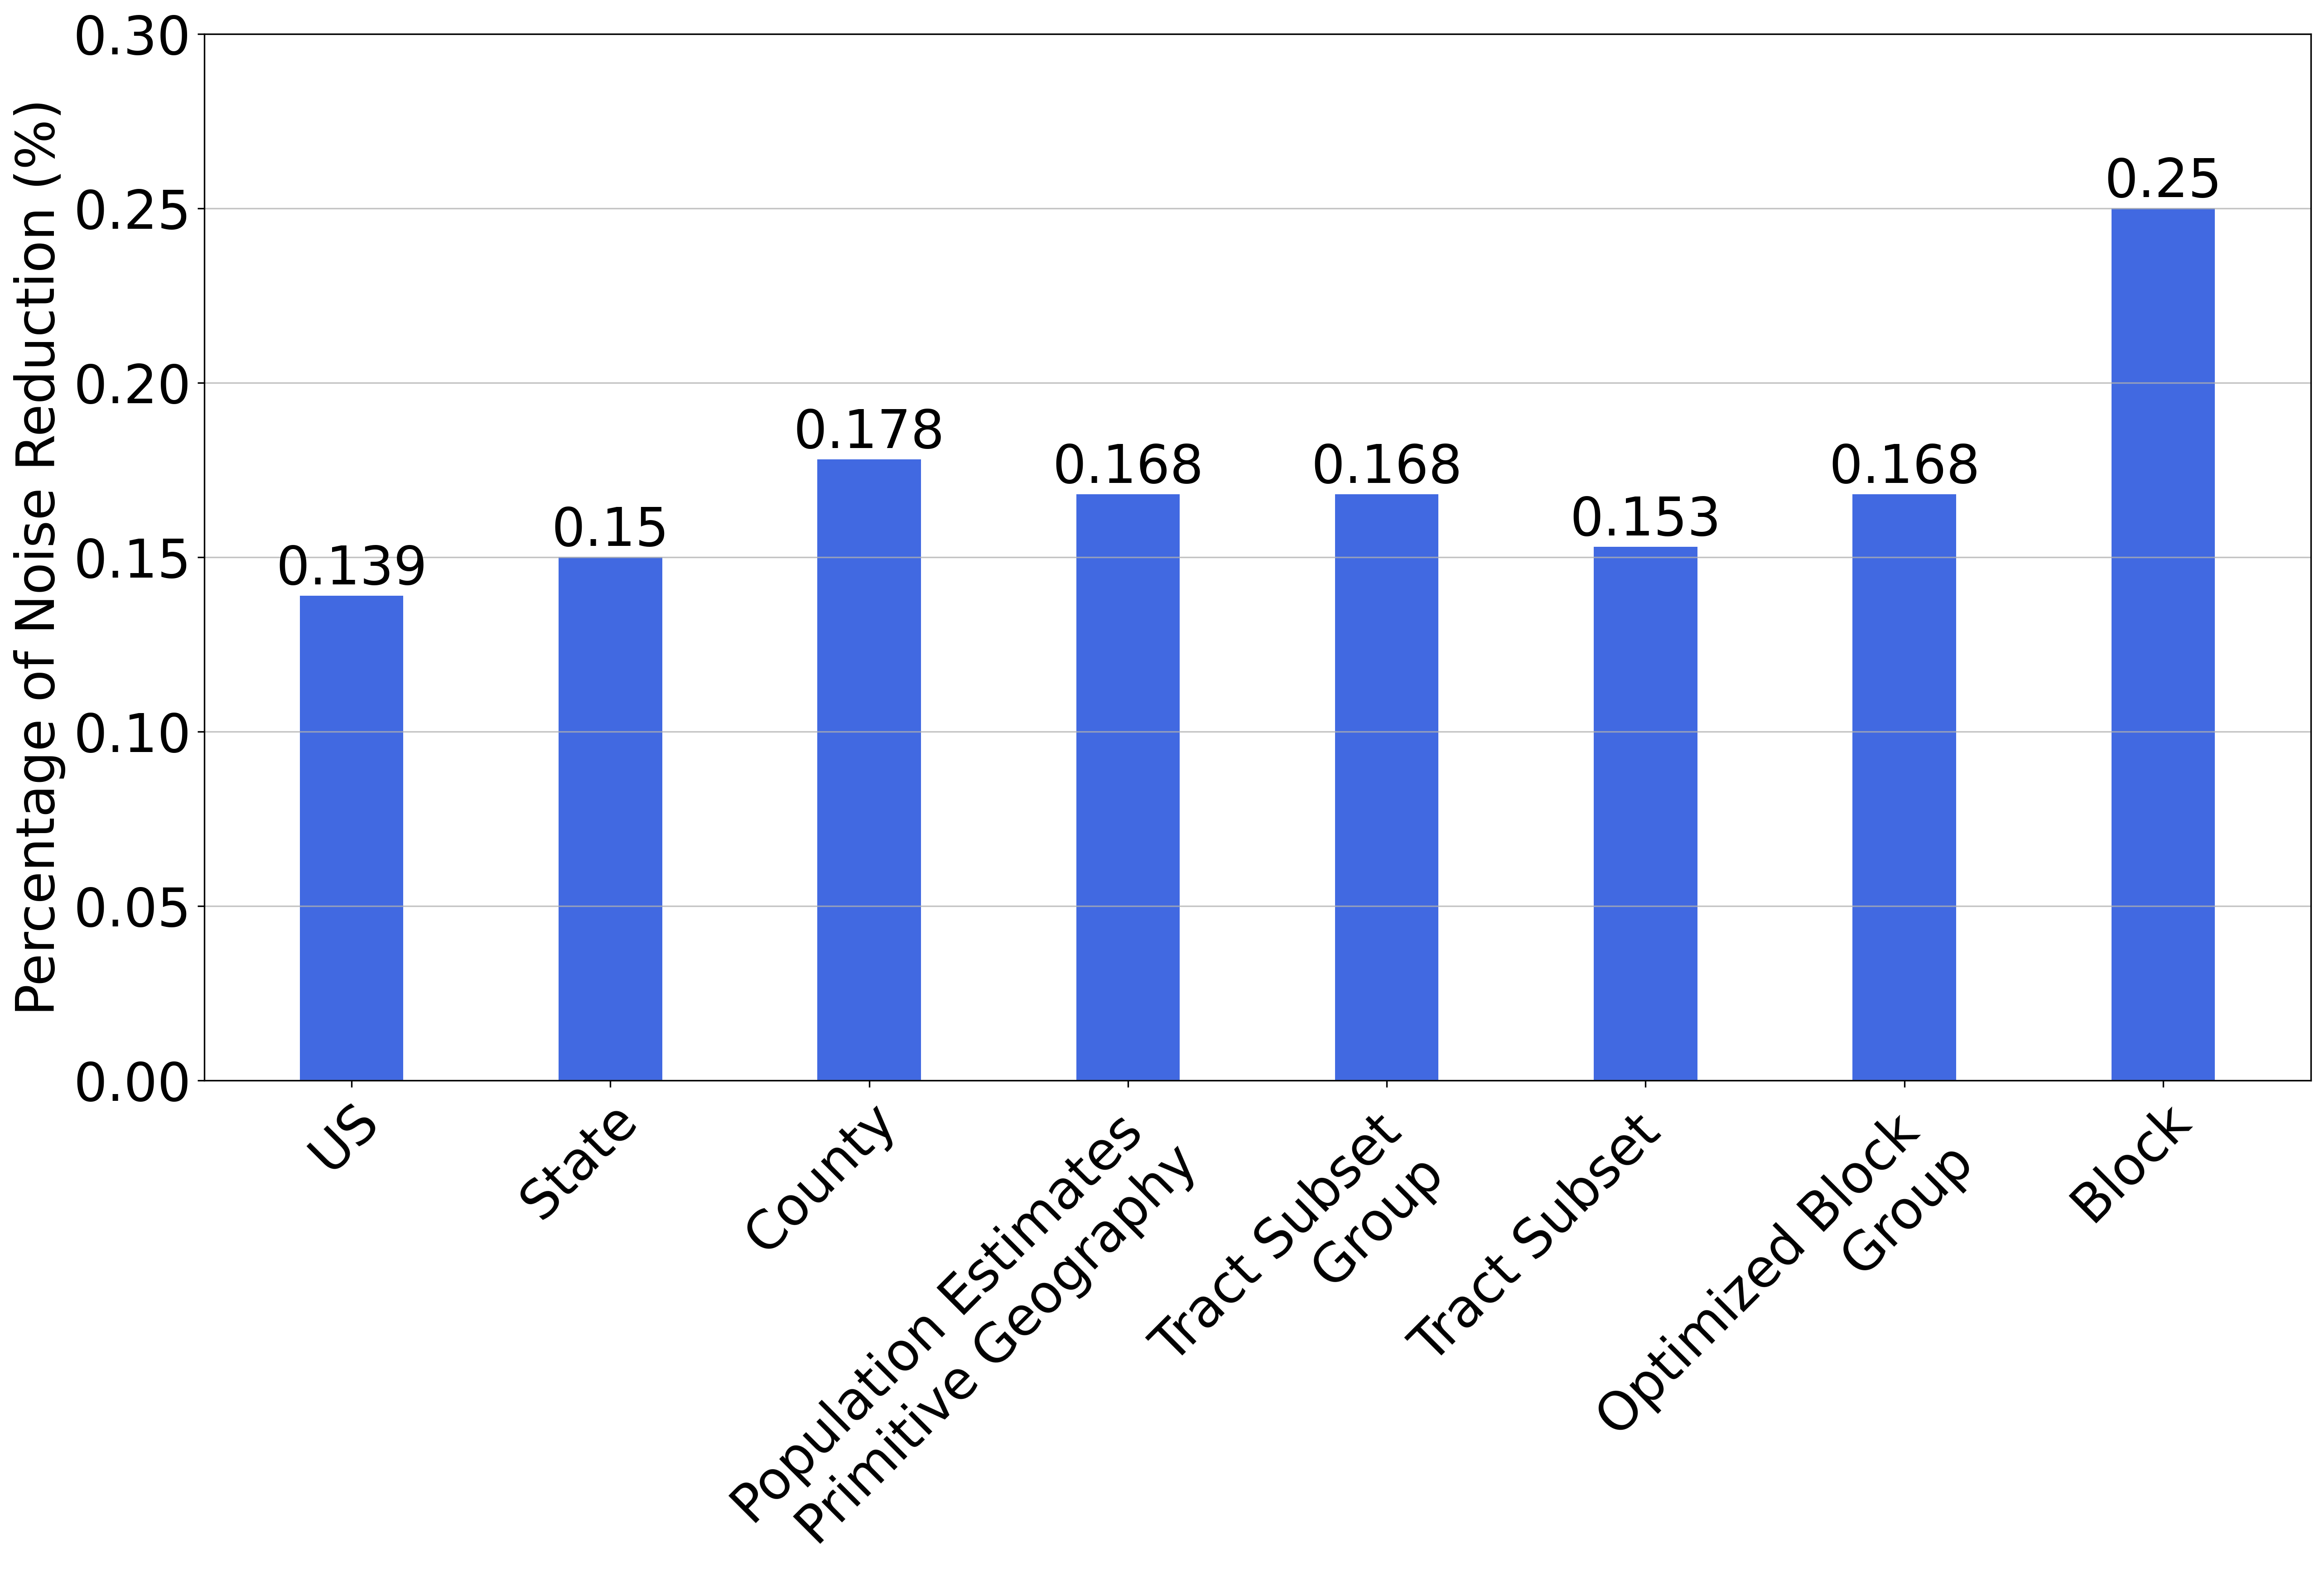

In [ ]:
geographic_levels = ["US", "State", "County", "Population Estimates \n Primitive Geography", "Tract Subset \n Group ", "Tract Subset ", "Optimized Block \n Group", "Block"]
values = [round((69.40 - 59.74)/69.40, 3), round((5.00-4.25)/5.00,2), round((16.07-13.21)/16.07, 3), round((10.47-8.71)/10.47, 3), round((10.47-8.71)/10.47, 3), round((5.77-4.89)/5.77, 3), round((10.47-8.71)/10.47, 3), round((451.13-338.28)/451.13, 3)]
# values = [100 * v for v in values]
total_bar_width = 0.8


fig = plt.figure()
# creating the bar plot
plt.bar(geographic_levels, values, color ='royalblue', width = 0.4)
# Add the numbers on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel("Percentage of Noise Reduction (%)")
plt.ylim(0, 0.3)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.yticks()

plt.grid(axis='y', alpha=0.75)
# plt.savefig("/content/drive/MyDrive/Research/Discrete Gaussian Mechanism/Results_2024_09_10/Figures_V1/IID_MSE_Improvement.svg", bbox_inches='tight')
plt.show()